# Miami Housing Price Prediction project

# Abstract
The goal of this project is to build and compare four different predictive models for housing prices in the Miami area based on geographical variables and other descriptive housing features (a total of 16 numerical variables). We are interested in discovering the major factor/s that affect housing prices and hence be able to make data-driven decisions regarding this housing market, reduce the risks of under/overvaluing properties, and prepare for the future housing market. We develop and compare models using DNN, SVM, random forest, and linear regression to find an optimal result. Using the metric Root Mean Squared Error (RMSE), we ranked our models from the best to the worst in the order of random forest, DNN, linear regression, and SVM. 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os 
os.chdir('/content/drive/MyDrive/cfrm_521_hw4')

import dataset

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras

csv_path = '/content/drive/MyDrive/cfrm_521_hw4/miami-housing.csv'
data = pd.read_csv(csv_path)

# Data Introduction
The dataset contains data on Miami single-family residences sold in 2016. This dataset includes basic housing information such as distance to the ocean, availability, balcony, location, size, price, and total sqft, with a total of 16 columns and 13932 rows. (Kaggle: https://www.kaggle.com/datasets/deepcontractor/miami-housing-dataset)

In [ ]:
data

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13927,25.783130,-80.259795,131320040990,275000.0,6780,967,6580,3844.5,20568.0,3252.4,22175.9,12150.1,917.4,16,0,4,4
13928,25.783585,-80.260354,131320040910,340000.0,7500,1854,2544,3593.6,20791.9,3077.7,22375.1,12316.8,738.2,26,0,5,4
13929,25.783793,-80.256126,131320040420,287500.0,8460,1271,2064,4143.2,20307.9,3588.4,20966.9,12433.0,743.7,16,0,7,4
13930,25.784007,-80.257542,131320040330,315000.0,7500,1613,3136,3986.9,20542.6,3589.1,21475.6,12458.0,626.1,16,0,8,4


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LATITUDE           13932 non-null  float64
 1   LONGITUDE          13932 non-null  float64
 2   PARCELNO           13932 non-null  int64  
 3   SALE_PRC           13932 non-null  float64
 4   LND_SQFOOT         13932 non-null  int64  
 5   TOT_LVG_AREA       13932 non-null  int64  
 6   SPEC_FEAT_VAL      13932 non-null  int64  
 7   RAIL_DIST          13932 non-null  float64
 8   OCEAN_DIST         13932 non-null  float64
 9   WATER_DIST         13932 non-null  float64
 10  CNTR_DIST          13932 non-null  float64
 11  SUBCNTR_DI         13932 non-null  float64
 12  HWY_DIST           13932 non-null  float64
 13  age                13932 non-null  int64  
 14  avno60plus         13932 non-null  int64  
 15  month_sold         13932 non-null  int64  
 16  structure_quality  139

In [ ]:
data.describe()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
count,13932.000000,13932.000000,1.393200e+04,1.393200e+04,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000
mean,25.728811,-80.327475,2.356496e+12,3.999419e+05,8620.879917,2058.044574,9562.493468,8348.548715,31690.993798,11960.285235,68490.327132,41115.047265,7723.770693,30.669251,0.014930,6.655828,3.513997
std,0.140633,0.089199,1.199290e+12,3.172147e+05,6070.088742,813.538535,13890.967782,6178.027333,17595.079468,11932.992369,32008.474808,22161.825935,6068.936108,21.153068,0.121276,3.301523,1.097444
min,25.434333,-80.542172,1.020008e+11,7.200000e+04,1248.000000,854.000000,0.000000,10.500000,236.100000,0.000000,3825.600000,1462.800000,90.200000,0.000000,0.000000,1.000000,1.000000
25%,25.620056,-80.403278,1.079160e+12,2.350000e+05,5400.000000,1470.000000,810.000000,3299.450000,18079.350000,2675.850000,42823.100000,23996.250000,2998.125000,14.000000,0.000000,4.000000,2.000000
50%,25.731810,-80.338911,3.040300e+12,3.100000e+05,7500.000000,1877.500000,2765.500000,7106.300000,28541.750000,6922.600000,65852.400000,41109.900000,6159.750000,26.000000,0.000000,7.000000,4.000000
75%,25.852269,-80.258019,3.060170e+12,4.280000e+05,9126.250000,2471.000000,12352.250000,12102.600000,44310.650000,19200.000000,89358.325000,53949.375000,10854.200000,46.000000,0.000000,9.000000,4.000000
max,25.974382,-80.119746,3.660170e+12,2.650000e+06,57064.000000,6287.000000,175020.000000,29621.500000,75744.900000,50399.800000,159976.500000,110553.800000,48167.300000,96.000000,1.000000,12.000000,5.000000


# Method 1: DNN

A deep neural network (DNN) is an artificial neural network (ANN) with multiple layers between the input and output layers. The multiple layers in DNN allow models to become more efficient at learning complex features and performing more intensive computational tasks.

###Data preprocessing

Both numerical and categorical data are standardized, while applying one hot encoder to categorical data. I used stratified shuffle split by floor area to get a test set size of 20%, a train set size of 80%. Then I did the same thing again to my train set to get the validation set the final train set.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import StratifiedShuffleSplit

data["floor_area"] = pd.cut(data["TOT_LVG_AREA"],
                               bins=[0, 1000, 1500, 2000, 2500, 3000, np.inf],
                               labels=[1, 2, 3, 4, 5, 6])

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["floor_area"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]
    
# Split the traning set into training and validation    
split2 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index2, valid_index in split2.split(strat_train_set, strat_train_set["floor_area"]):
    strat_train2_set = strat_train_set.iloc[train_index2]
    strat_valid_set = strat_train_set.iloc[valid_index]

strat_train_set = strat_train2_set.copy().drop("floor_area", axis=1)
strat_valid_set = strat_valid_set.copy().drop("floor_area", axis=1)
strat_test_set = strat_test_set.copy().drop("floor_area", axis=1)

X_raw = strat_train_set.drop("SALE_PRC", axis=1)
y_train = strat_train_set["SALE_PRC"]

num_pipeline = Pipeline([
        # ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ("cat", OneHotEncoder(sparse=False)),
        ('std_scaler', StandardScaler())
    ])

num_attribs = list(X_raw)
num_attribs.remove("avno60plus")
num_attribs.remove("structure_quality")
cat_attribs = ["avno60plus", "structure_quality"]

full_pipeline = ColumnTransformer([
        ("cat", cat_pipeline, cat_attribs),
        ("num", num_pipeline, num_attribs),
    ])

# Apply the pipeline to the training set
X_train = full_pipeline.fit_transform(X_raw)

# Apply the pipeline to the validation set
X_valid_raw = strat_valid_set.drop("SALE_PRC", axis=1)
y_valid = strat_valid_set["SALE_PRC"]
X_valid = full_pipeline.transform(X_valid_raw)

# Apply the pipeline to the validation set
X_test_raw = strat_test_set.drop("SALE_PRC", axis=1)
y_test = strat_test_set["SALE_PRC"]
X_test = full_pipeline.transform(X_test_raw)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(8916, 21)
(8916,)


In [ ]:
X_train

array([[ 0.98560794,  0.55897431, -1.61076829, ...,  0.        ,
         1.        ,  0.        ],
       [-0.85311582, -0.18892953,  0.82781984, ...,  0.        ,
         1.        ,  0.        ],
       [-1.26900685, -0.60274392,  0.5937948 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.40339503, -0.02121126,  0.5778597 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.37159456, -0.12053397,  0.71943668, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.03244468, -1.11729512,  0.57706864, ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:
y_train

1143      256000.0
4988      425000.0
8641      305000.0
4869     1080000.0
9331      305000.0
           ...    
7829      225000.0
8657      367000.0
4598      547000.0
11235     590000.0
11914     350000.0
Name: SALE_PRC, Length: 8916, dtype: float64

In [ ]:
import random as python_random

def reset_session(seed=42):
    tf.random.set_seed(seed)
    python_random.seed(seed)
    np.random.seed(seed)
    tf.keras.backend.clear_session()

This function ensures that the results stay the same after each run since the seed has been set to 42. I'll run this function before each model.

### Model 1: SELU, LeCun, Nadam, perfomance Scheduling, epochs = 2000



In [ ]:
reset_session
model1 = keras.models.Sequential()

model1.add(keras.layers.InputLayer(input_shape=(21,)))
model1.add(keras.layers.Dense(50, activation="selu", 
                              kernel_initializer="lecun_normal"))
model1.add(keras.layers.Dense(1))

optimizer = keras.optimizers.Nadam()
model1.compile(loss="mse",
               optimizer=optimizer)

lr_scheduler = keras.callbacks.ReduceLROnPlateau()

run = model1.fit(X_train, y_train, epochs=2000,
                 validation_data=(X_valid, y_valid),
                 callbacks = [lr_scheduler], verbose=0)
pd.DataFrame(run.history).iloc[-11:]

,loss,val_loss,lr
989,1.863602e+10,1.822546e+10,0.001
990,1.863238e+10,1.822144e+10,0.001
991,1.862814e+10,1.821649e+10,0.001
992,1.862393e+10,1.821437e+10,0.001
993,1.862026e+10,1.821041e+10,0.001
994,1.861580e+10,1.820693e+10,0.001
995,1.861207e+10,1.820393e+10,0.001
996,1.860795e+10,1.819995e+10,0.001
997,1.860451e+10,1.819680e+10,0.001
998,1.859999e+10,1.819301e+10,0.001


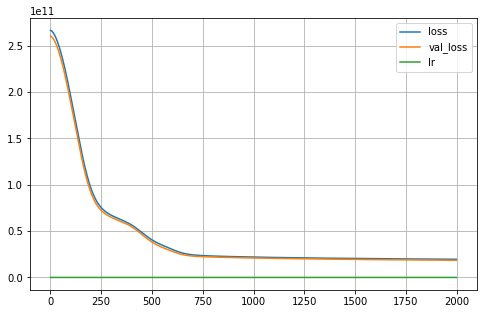

In [ ]:
import matplotlib.pyplot as plt
pd.DataFrame(run.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca()
plt.show()

From the table and plot above, we could see that both loss and validation loss dropped by a lot before epoch 250. Once they reached around 750, the losses became quite flat. Therefore, for the later models, I'll only use 1000 epochs to compare each model. This way we could also save some time.

Anoher observation is that the two loss lines are really close to each other. This indicates the model is not overfitted, which is good.

### Model 2: SELU, LeCun, Nadam, perfomance Scheduling, epochs = 1000


In [ ]:
reset_session
model2 = keras.models.Sequential()

model2.add(keras.layers.InputLayer(input_shape=(21,)))
model2.add(keras.layers.Dense(50, activation="selu", 
                              kernel_initializer="lecun_normal"))
model2.add(keras.layers.Dense(1))

optimizer = keras.optimizers.Nadam()
model2.compile(loss="mse",
               optimizer=optimizer)

lr_scheduler = keras.callbacks.ReduceLROnPlateau()

run = model2.fit(X_train, y_train, epochs=1000,
                 validation_data=(X_valid, y_valid),
                 callbacks = [lr_scheduler], verbose=0)
pd.DataFrame(run.history).iloc[-11:]

,loss,val_loss,lr
989,2.164897e+10,2.061744e+10,0.001
990,2.164513e+10,2.061327e+10,0.001
991,2.164159e+10,2.061022e+10,0.001
992,2.163785e+10,2.060579e+10,0.001
993,2.163321e+10,2.060213e+10,0.001
994,2.162947e+10,2.059811e+10,0.001
995,2.162561e+10,2.059469e+10,0.001
996,2.162216e+10,2.059092e+10,0.001
997,2.161785e+10,2.058626e+10,0.001
998,2.161407e+10,2.058327e+10,0.001


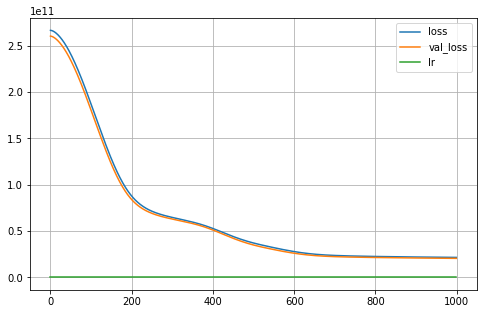

In [ ]:
pd.DataFrame(run.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca()
plt.show()

RMSE of the test set

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = model2.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

132990.13979436285

RMSE of the validation set

In [ ]:
rmse2 = np.sqrt(model2.evaluate(X_valid, y_valid))
rmse2

70/70 [==============================] - 0s 2ms/step - loss: 20579788800.0000


143456.5746140622

Model 2 is the same as model 1, but with only 1000 epoch. I'm running this again so I could compare this model to other models with 1000 epochs.

From model 2, we get an RMSE of 132990.13979436285 for test set and 143456.5746140622 for validation set.

The model is not overfitting and constantly decreasing. It has reached a comparably flat area around epoch 700.

### Model 3: RELU, he, Nadam, perfomance Scheduling, epochs = 1000




In [ ]:
reset_session
model3 = keras.models.Sequential()

model3.add(keras.layers.InputLayer(input_shape=(21,)))
model3.add(keras.layers.Dense(50, activation="relu", 
                              kernel_initializer="he_normal"))
model3.add(keras.layers.Dense(1))

optimizer = keras.optimizers.Nadam()
model3.compile(loss="mse",
               optimizer=optimizer)

lr_scheduler = keras.callbacks.ReduceLROnPlateau()

run = model3.fit(X_train, y_train, epochs=1000,
                 validation_data=(X_valid, y_valid),
                 callbacks = [lr_scheduler], verbose=0)
pd.DataFrame(run.history).iloc[-11:]

,loss,val_loss,lr
989,1.878699e+10,1.758227e+10,0.001
990,1.878413e+10,1.757854e+10,0.001
991,1.878102e+10,1.757604e+10,0.001
992,1.877834e+10,1.757242e+10,0.001
993,1.877479e+10,1.756967e+10,0.001
994,1.877212e+10,1.756601e+10,0.001
995,1.876961e+10,1.756313e+10,0.001
996,1.876599e+10,1.755986e+10,0.001
997,1.876324e+10,1.755620e+10,0.001
998,1.876005e+10,1.755351e+10,0.001


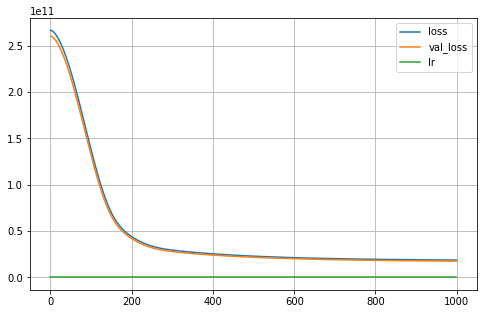

In [ ]:
import matplotlib.pyplot as plt
pd.DataFrame(run.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca()
plt.show()

RMSE of the test set

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = model3.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

123016.66579945435

RMSE of the validation set

In [ ]:
rmse3 = np.sqrt(model3.evaluate(X_valid, y_valid))
rmse3

70/70 [==============================] - 0s 2ms/step - loss: 17550254080.0000


132477.37195460967

While model 2 was already a good, non-overfitting model, I'd like to see whether a different model would work better. And indeed, model 3 arrived at better RMSE results: an RMSE of 123016.66579945435 for test set and 132477.37195460967 for validation set. 

Also, the loss curves seem to reduce much faster than the ones in model 2.

Since this is a better model, I'll next perform hyperparameter tunning on model 3.

### Hyperparameter Tunning on Model 3

In this process, I'll be trying for hidden layers 0 to 3, 1 to 100 neurons, and learning rates of the reciprocals of 3e-4 and 3e-2.

Due to time limitation, I'll only perform the running for 200 epoches since that's when the loss curves grew to be kind of flat.

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[21]):
  model = keras.models.Sequential()
  model.add(keras.layers.InputLayer(input_shape=input_shape))
  for layer in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation="relu", kernel_initializer="he_normal"))
  model.add(keras.layers.Dense(1))
  optimizer = keras.optimizers.Nadam(learning_rate=learning_rate)
  model.compile(loss="mse", optimizer=optimizer)
  return model

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}
early_stop = keras.callbacks.EarlyStopping(patience=10)
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=200,
                  validation_data=(X_valid, y_valid),
                  callbacks=[early_stop])  

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Streaming output truncated to the last 5000 lines.
186/186 [==============================] - 1s 4ms/step - loss: 20032659456.0000 - val_loss: 18644172800.0000
Epoch 108/200
186/186 [==============================] - 1s 4ms/step - loss: 19983650816.0000 - val_loss: 18595209216.0000
Epoch 109/200
186/186 [==============================] - 1s 3ms/step - loss: 19946858496.0000 - val_loss: 18551840768.0000
Epoch 110/200
186/186 [==============================] - 1s 3ms/step - loss: 19899097088.0000 - val_loss: 18514995200.0000
Epoch 111/200
186/186 [==============================] - 1s 4ms/step - loss: 19850291200.0000 - val_loss: 18452363264.0000
Epoch 112/200
186/186 [==============================] - 1s 4ms/step - loss: 19812337664.0000 - val_loss: 18419130368.0000
Epoch 113/200
186/186 [==============================] - 1s 4ms/step - loss: 19776768000.0000 - val_loss: 18380529664.0000
Epoch 114/200
186/186 [==============================] - 1s 4ms/step - loss: 19728674816.0000 - val_lo

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f351b101e10>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f351b101e90>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

Best parameters we arrived at:

In [ ]:
rnd_search_cv.best_params_

{'learning_rate': 0.0033625641252688094, 'n_hidden': 2, 'n_neurons': 42}

Save our best model as model_tunned

In [ ]:
model_tuned = rnd_search_cv.best_estimator_.model

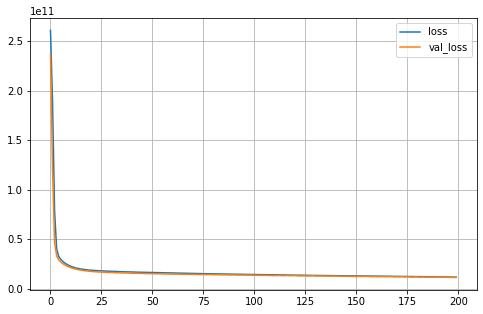

In [ ]:
import matplotlib.pyplot as plt

run = model_tuned.history
pd.DataFrame(run.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca()
plt.show()

RMSE of the test set

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = model_tuned.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

99275.94949917594

RMSE of the validation set

In [ ]:
rmse3 = np.sqrt(model_tuned.evaluate(X_valid, y_valid))
rmse3

70/70 [==============================] - 0s 2ms/step - loss: 11519873024.0000


107330.6714038443

Using the best parameters I got, the new RMSE been calculated are: 99275.94949917594 for test set and 107330.6714038443 for validation set. These numbers are better the the ones from model 2 and 3.

However, to better compare, we need to re-run this model with 1000 epoches.

### Best Model with 1000 Epoches

In [ ]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau()

run = model_tuned.fit(X_train, y_train, epochs=1000,
                 validation_data=(X_valid, y_valid),
                 callbacks = [lr_scheduler], verbose=0)
pd.DataFrame(run.history).iloc[-11:]

,loss,val_loss,lr
989,9.291591e+09,9.826407e+09,3.362564e-89
990,9.291596e+09,9.826407e+09,3.362564e-89
991,9.291597e+09,9.826407e+09,3.362564e-89
992,9.291594e+09,9.826407e+09,3.362564e-89
993,9.291596e+09,9.826407e+09,3.362564e-89
994,9.291597e+09,9.826407e+09,3.362564e-90
995,9.291595e+09,9.826407e+09,3.362564e-90
996,9.291599e+09,9.826407e+09,3.362564e-90
997,9.291593e+09,9.826407e+09,3.362564e-90
998,9.291598e+09,9.826407e+09,3.362564e-90


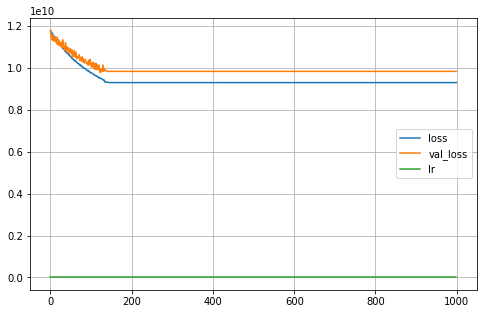

In [ ]:
pd.DataFrame(run.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca()
plt.show()

RMSE of the test set

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = model_tuned.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

92064.82521691089

RMSE of the validation set

In [ ]:
rmse_final = np.sqrt(model_tuned.evaluate(X_valid, y_valid))
rmse_final

70/70 [==============================] - 0s 2ms/step - loss: 9826407424.0000


99128.23726870159

After fitting my final model, I get a RMSE of 92064.82521691089 for test set and 99128.23726870159 for validation set, which are both better than model 2 and model 3.

# Method 2: SVM

Developed at the AT&T Bell Laboratories, SVM is a powerful machine learning tool for classification and regression. In contrast to classification, SVM regression tries to fit as many instances as possible on the street while limiting the number of instances off the street. It is important to scale the data before training. If the training set is not scaled, the SVM will tend to neglect small features. 

In [ ]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import StratifiedShuffleSplit

data["floor_area"] = pd.cut(data["TOT_LVG_AREA"],
                               bins=[0, 1000, 1500, 2000, 2500, 3000, np.inf],
                               labels=[1, 2, 3, 4, 5, 6])

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(data, data["floor_area"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]
    
for set_ in (strat_train_set, strat_test_set):
    set_.drop("floor_area", axis=1, inplace=True)
    
X_raw = strat_train_set.drop("SALE_PRC", axis=1)
y = strat_train_set["SALE_PRC"].copy()

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

num_features = X_raw.drop(["avno60plus","structure_quality"], axis=1)
num_attribs = list(num_features)

cat_attribs = ["avno60plus","structure_quality"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

X = full_pipeline.fit_transform(X_raw)

X_test_raw = strat_test_set.drop("SALE_PRC", axis=1)
y_test = strat_test_set["SALE_PRC"].copy()
X_test = full_pipeline.transform(X_test_raw)

###Training method

Train SVM regression with a Gaussian RBF kernel and a sigmoid kernel with max_iter=5000. For both models, use randomized search to choose optimal hyperparameter values for C and gamma. C is uniformly distributed between 1 and 10. Gamma is a reciprocal list of 0.001 and 0.1.

The performance measure is MSE.

In [ ]:
from sklearn.svm import SVR
from scipy.stats import reciprocal, uniform
from sklearn.model_selection import RandomizedSearchCV

svr_rbf = SVR(max_iter=50000, kernel='rbf')

param_distrib = {'C':uniform(1,10), 'gamma':reciprocal(0.001,0.1),}

rnd_search_rbf_svr = RandomizedSearchCV(svr_rbf, param_distributions=param_distrib, n_iter=10, cv=3, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
rnd_search_rbf_svr.fit(X,y)

rnd_search_rbf_svr.best_params_

{'C': 8.31993941811405, 'gamma': 0.015751320499779724}

The best score of the optimal parameters with the rbf kernel...

In [ ]:
-rnd_search_rbf_svr.best_score_

111074532592.16557

Predict y values using the optimal parameters of rbf and calculate RMSE of against the original target values.

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred_rbf = rnd_search_rbf_svr.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, y_pred_rbf)
np.sqrt(mse)

306704.3602123964

Now find the optimal parametrers with the sigmoid kernel.

In [ ]:
svr_sig = SVR(max_iter=50000, kernel='sigmoid')
param_distrib = {'C':uniform(1,10), 'gamma':reciprocal(0.001,0.1),}

rnd_search_sig_mse = RandomizedSearchCV(svr_sig, param_distributions=param_distrib, n_iter=10, cv=3,
                                       scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
rnd_search_sig_mse.fit(X,y)
rnd_search_sig_mse.best_params_

{'C': 4.745401188473625, 'gamma': 0.07969454818643928}

The best score of the best estimators with the sigmoid kernel...

In [ ]:
-rnd_search_sig_mse.best_score_

110349795861.86897

Since the best score (MSE) of the sigmoid kernel is lower than that of the rbf, sigmoid performs better than rbf. We then evaluate RMSE of the test set with the sigmoid kernel.

In [ ]:
from sklearn.metrics import mean_squared_error

y_test_pred = rnd_search_sig_mse.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
np.sqrt(mse)

305113.30149341706

### PCA

Now we use PCA to reduce dimensions, accounting for 85% variability. The reduced set only has 9 components.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.85)
X_reduced = pca.fit_transform(X)
pca.n_components_

8

Similar as before, train the SVM model using the reduced set with rbf and sigmoid kernel. Use Randomized Search to find best parameters of each kernel.

In [ ]:
rnd_search_rbf_svr.fit(X_reduced,y)

rnd_search_rbf_svr.best_params_

{'C': 7.011150117432088, 'gamma': 0.026070247583707663}

In [ ]:
-rnd_search_rbf_svr.best_score_

111017328207.62018

In [ ]:
X_test_reduced = pca.transform(X_test)
y_pred_rbf_reduced = rnd_search_rbf_svr.best_estimator_.predict(X_test_reduced)
mse = mean_squared_error(y_test, y_pred_rbf_reduced)
np.sqrt(mse)

306545.608281829

In [ ]:
rnd_search_sig_mse.fit(X_reduced,y)
rnd_search_sig_mse.best_params_

{'C': 4.745401188473625, 'gamma': 0.07969454818643928}

In [ ]:
-rnd_search_sig_mse.best_score_

110309892777.89818

In [ ]:
X_test_reduced = pca.transform(X_test)
y_test_pred_reduced = rnd_search_sig_mse.best_estimator_.predict(X_test_reduced)
mse = mean_squared_error(y_test, y_test_pred_reduced)
np.sqrt(mse)

305099.3276451965

With the reduced set, sigmoid kernel still performs better than rbf. RMSE of sigmoid is now lower than that of the original set. So PCA helps.

In [ ]:
y[:5]

12578     300000.0
11787     490000.0
5887      600000.0
5238     1287000.0
8989      213000.0
Name: SALE_PRC, dtype: float64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LATITUDE           13932 non-null  float64
 1   LONGITUDE          13932 non-null  float64
 2   PARCELNO           13932 non-null  int64  
 3   SALE_PRC           13932 non-null  float64
 4   LND_SQFOOT         13932 non-null  int64  
 5   TOT_LVG_AREA       13932 non-null  int64  
 6   SPEC_FEAT_VAL      13932 non-null  int64  
 7   RAIL_DIST          13932 non-null  float64
 8   OCEAN_DIST         13932 non-null  float64
 9   WATER_DIST         13932 non-null  float64
 10  CNTR_DIST          13932 non-null  float64
 11  SUBCNTR_DI         13932 non-null  float64
 12  HWY_DIST           13932 non-null  float64
 13  age                13932 non-null  int64  
 14  avno60plus         13932 non-null  int64  
 15  month_sold         13932 non-null  int64  
 16  structure_quality  139

###Graphs & Plots

Since we have the longtitude and latitude of each house, the following scatterplot visualizes the geographical data against sale prices. Clearly, we can see that houses along the shoreline were sold for high prices, and houses on the islands had the highest prices (red dots).

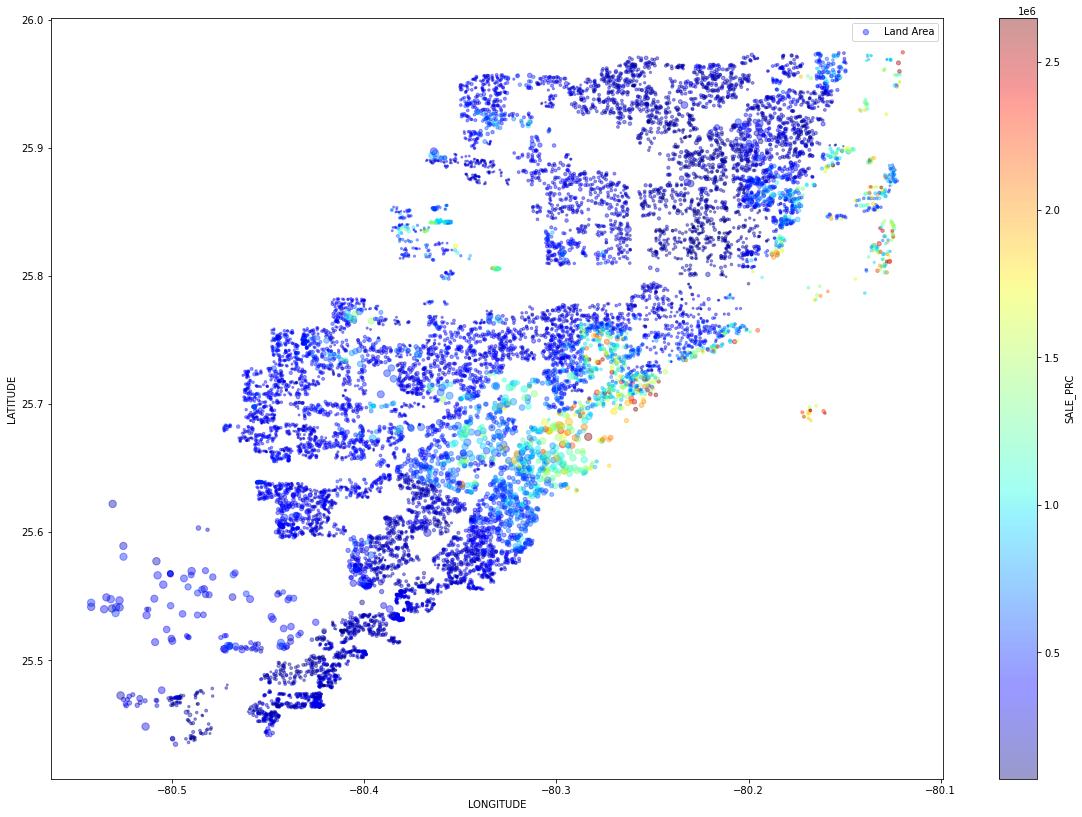

In [ ]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
data.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", alpha=0.4,
             s=data["LND_SQFOOT"]/1000, label="Land Area", figsize=(20,14),
             c="SALE_PRC", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
#save_fig("housing_prices_scatterplot")

In [ ]:
corr_matrix = data.corr()

The table below shows the correlation of each variable with sale price. Total living area has a remarkable positive correlation with sale price.

In [ ]:
corr_matrix["SALE_PRC"].sort_values(ascending=False)

SALE_PRC             1.000000
TOT_LVG_AREA         0.667301
SPEC_FEAT_VAL        0.497500
structure_quality    0.383995
LND_SQFOOT           0.363077
HWY_DIST             0.231877
LONGITUDE            0.195274
LATITUDE             0.047701
month_sold           0.000325
avno60plus          -0.027026
RAIL_DIST           -0.077009
age                 -0.123408
WATER_DIST          -0.127938
PARCELNO            -0.204068
CNTR_DIST           -0.271425
OCEAN_DIST          -0.274675
SUBCNTR_DI          -0.370078
Name: SALE_PRC, dtype: float64

The following scatter matrix displays correlations of Total Living Area, Value of Special Features (swimming pool), and Distance to the Nearest Subcenter with Sale Price. The positive pattern of Total Living Area is the most conspicuous.

array([[<AxesSubplot:xlabel='SALE_PRC', ylabel='SALE_PRC'>,
        <AxesSubplot:xlabel='TOT_LVG_AREA', ylabel='SALE_PRC'>,
        <AxesSubplot:xlabel='SPEC_FEAT_VAL', ylabel='SALE_PRC'>,
        <AxesSubplot:xlabel='SUBCNTR_DI', ylabel='SALE_PRC'>],
       [<AxesSubplot:xlabel='SALE_PRC', ylabel='TOT_LVG_AREA'>,
        <AxesSubplot:xlabel='TOT_LVG_AREA', ylabel='TOT_LVG_AREA'>,
        <AxesSubplot:xlabel='SPEC_FEAT_VAL', ylabel='TOT_LVG_AREA'>,
        <AxesSubplot:xlabel='SUBCNTR_DI', ylabel='TOT_LVG_AREA'>],
       [<AxesSubplot:xlabel='SALE_PRC', ylabel='SPEC_FEAT_VAL'>,
        <AxesSubplot:xlabel='TOT_LVG_AREA', ylabel='SPEC_FEAT_VAL'>,
        <AxesSubplot:xlabel='SPEC_FEAT_VAL', ylabel='SPEC_FEAT_VAL'>,
        <AxesSubplot:xlabel='SUBCNTR_DI', ylabel='SPEC_FEAT_VAL'>],
       [<AxesSubplot:xlabel='SALE_PRC', ylabel='SUBCNTR_DI'>,
        <AxesSubplot:xlabel='TOT_LVG_AREA', ylabel='SUBCNTR_DI'>,
        <AxesSubplot:xlabel='SPEC_FEAT_VAL', ylabel='SUBCNTR_DI'>,
        <Axes

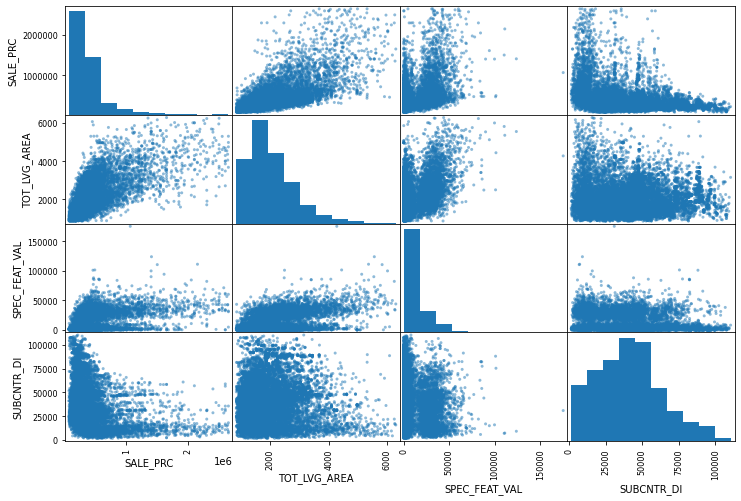

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["SALE_PRC", "TOT_LVG_AREA", "SPEC_FEAT_VAL",
              "SUBCNTR_DI"]
scatter_matrix(data[attributes], figsize=(12, 8))

# Method 3: Decision Tree & Random Forests

A decision tree algorithm can be used for solving both regression and classification problems. The random forest regression model is a supervised learning algorithm that works by training many Decision Trees on random subsets of the features, then averaging out their predictions.


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import StratifiedShuffleSplit
import seaborn as sns

First we will clean and transform the data. I also convert categorical features to numerical values. 

In [ ]:

data["floor_area"] = pd.cut(data["TOT_LVG_AREA"],
                               bins=[0, 1000, 1500, 2000, 2500, 3000, np.inf],
                               labels=[1, 2, 3, 4, 5, 6])

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(data, data["floor_area"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]
    
for set_ in (strat_train_set, strat_test_set):
    set_.drop("floor_area", axis=1, inplace=True)
    
X_raw = strat_train_set.drop("SALE_PRC", axis=1)
y = strat_train_set["SALE_PRC"].copy()

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

num_features = X_raw.drop(["avno60plus","structure_quality"], axis=1)
num_attribs = list(num_features)

cat_attribs = ["avno60plus","structure_quality"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

X = full_pipeline.fit_transform(X_raw)

X_test_raw = strat_test_set.drop("SALE_PRC", axis=1)
y_test = strat_test_set["SALE_PRC"].copy()
X_test = full_pipeline.transform(X_test_raw)

<AxesSubplot:>

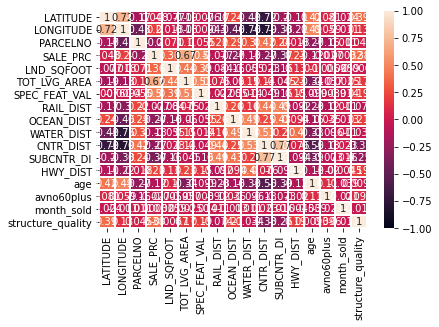

In [ ]:
corr_matrix = data.corr(method = 'pearson')
sns.heatmap(corr_matrix,vmax=1.0, vmin=-1.0, linewidths=0.1,annot=True)

I then plot the pair plot to show the relationship between the price, size, and distance to various transportations. It’s easy to see that there is a positive relationship between price and structure quality and SPEC_FEAT_VAL.

D:\anoconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anoconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anoconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anoconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

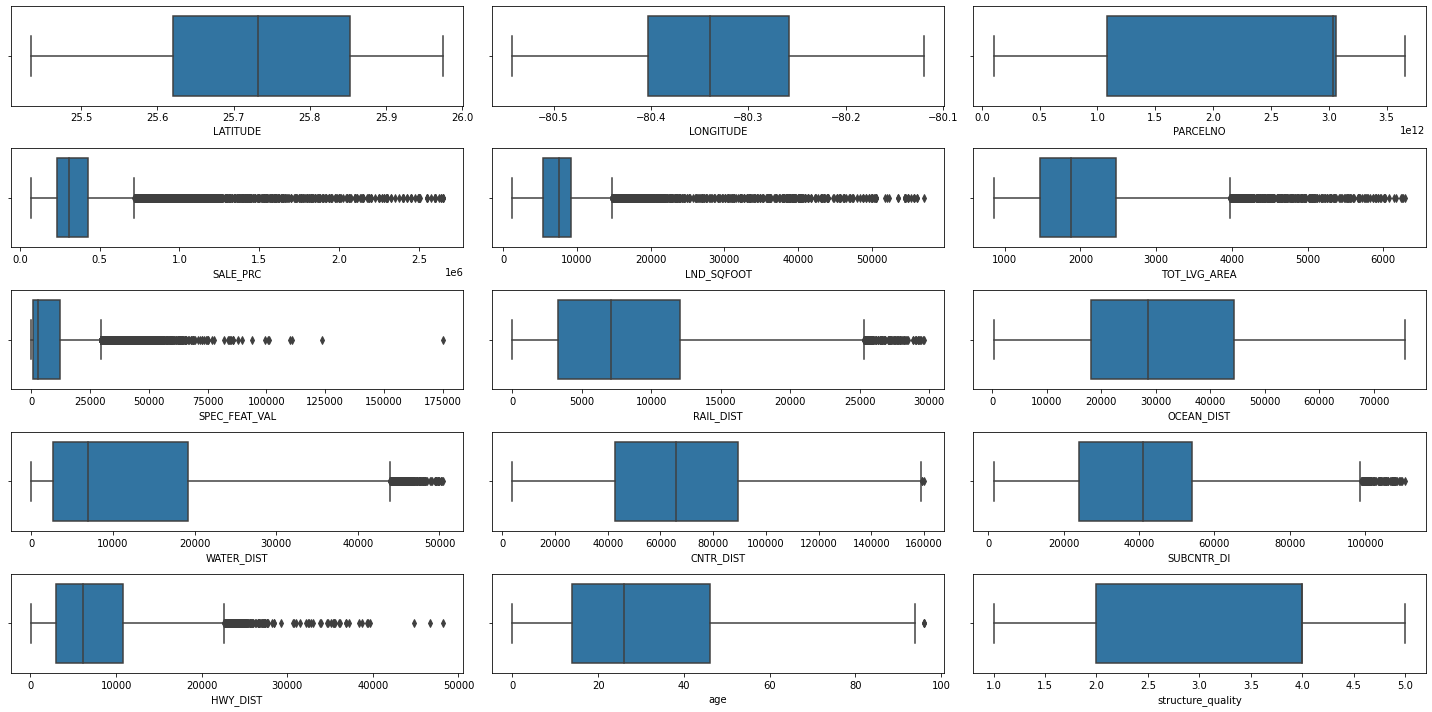

In [ ]:
fig, axs = plt.subplots(5,3, figsize = (20,10))
plt1 = sns.boxplot(data['LATITUDE'], ax = axs[0,0])
plt2 = sns.boxplot(data['LONGITUDE'], ax = axs[0,1])
plt3 = sns.boxplot(data['PARCELNO'], ax = axs[0,2])
plt1 = sns.boxplot(data['SALE_PRC'], ax = axs[1,0])
plt2 = sns.boxplot(data['LND_SQFOOT'], ax = axs[1,1])
plt3 = sns.boxplot(data['TOT_LVG_AREA'], ax = axs[1,2])
plt1 = sns.boxplot(data['SPEC_FEAT_VAL'], ax = axs[2,0])
plt2 = sns.boxplot(data['RAIL_DIST'], ax = axs[2,1])
plt3 = sns.boxplot(data['OCEAN_DIST'], ax = axs[2,2])
plt1 = sns.boxplot(data['WATER_DIST'], ax = axs[3,0])
plt2 = sns.boxplot(data['CNTR_DIST'], ax = axs[3,1])
plt3 = sns.boxplot(data['SUBCNTR_DI'], ax = axs[3,2])
plt1 = sns.boxplot(data['HWY_DIST'], ax = axs[4,0])
plt2 = sns.boxplot(data['age'], ax = axs[4,1])
plt3 = sns.boxplot(data['structure_quality'], ax = axs[4,2])
plt.tight_layout()

The scatter plots help us visualize the magnitude of the data points. From the scatter plots we can tell that Sale price and square foot of the house has a lot ourtliers. According to the visualization, the highest recorded sale is about three million


I used the Decision tree and Random Forest regression algorithm to predict the price of the houses. After processing the data, I trained the model, and evaluate it on the training set.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [ ]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X,y)
housing_predictions = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

137721.30654237096

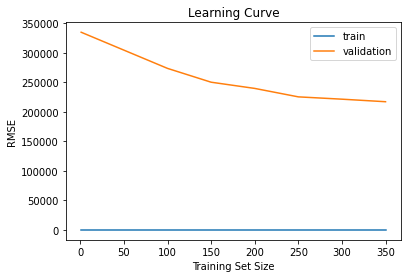

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=tree_reg, X=X, y=y,cv=5,
                                                        scoring="neg_root_mean_squared_error",
                                                        train_sizes = [1, 100, 150, 200,  250, 300, 350])
plt.plot(train_sizes,  -train_scores.mean(axis=1), label="train")
plt.plot(train_sizes, -test_scores.mean(axis=1), label="validation")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.legend(loc="best")

plt.show()

The RMSE score of decison tree regressor evaluated on the test set is 137721.87. To obtain out-of-sample performance, we then use Scikit-Learn’s K-fold cross-validation feature to better evaluate our model. I used 10 fold validation which I randomly divided the training set into ten independent subsets and each time selecting a different fold for assessment and training on the other nine folds. The following are the 10 evaluation scores given by cross validation.

In [ ]:
scores = cross_val_score(tree_reg, X_test, y_test, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
 def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(tree_rmse_scores)

Scores: [152665.07899348 113876.8054478  160121.24942096 212299.06586977
 203140.64675882 169989.18519258 111460.48691518 167753.83968725
 197198.33971474 115253.88939721]
Mean: 160375.8587397793
Standard deviation: 35606.15243440419


I obtained the average of the scores. And we can see that the Decision Tree regressor has a score of approximately 160375.85 and standard deviation of 35606.15.
Then let’s take a look at the Random Forests regressor. The model work by training many Decision Trees on random subsets of the features, then averaging out their predictions. 

The RSME score we got from Random Forests looks a lot better than decision tree model, which is 86613.98.

In [ ]:
forest_reg = RandomForestRegressor()
forest_reg.fit(X,y)
housing_predictions = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, housing_predictions)
forest_rmse= np.sqrt(forest_mse)
forest_rmse

86109.2946186394

The random forest has the best out-of-sample performance (lowest RMSE: 86109).

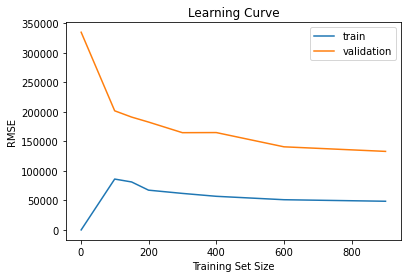

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(estimator=forest_reg, X=X, y=y,cv=5,
                                                        scoring="neg_root_mean_squared_error",
                                                        train_sizes = [1, 100, 150, 200, 300, 400,600,900])
plt.plot(train_sizes,  -train_scores.mean(axis=1), label="train")
plt.plot(train_sizes, -test_scores.mean(axis=1), label="validation")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.legend(loc="best")

plt.show()

In [ ]:
scores = cross_val_score(forest_reg, X_test, y_test,scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores: [ 95983.03684761 103881.14449021 105702.69183267  93803.49174176
 134291.64227384 101747.73113927  74063.32131613 118376.81299546
 142323.05755692  87135.76741732]
Mean: 105730.86976111893
Standard deviation: 19798.503817122804


The 10 fold cross validation RMSE score of decison tree regressor evaluated on the test set is 105730.86, and Standard deviation is 19798.50. To fine-tune the model I used Grid search, the grid search explored 18 combinations of RandomForestRegressor hyperparameter values, and it will train each model five times. 

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [
     {'n_estimators': [100, 300, 600], 'max_features': [2, 4, 6, 8]},
     {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [100, 300, 600]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 100}

After tuning the model, we obtain the best solution by setting the max_features hyperparameter to 6, and the n_estimators hyperparameter to 100. Next we'll use feature_importances_ variable to measure the relative importance of each feature.

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6)

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

101887.8458933213 {'max_features': 2, 'n_estimators': 100}
100684.74008321113 {'max_features': 2, 'n_estimators': 300}
100001.25370698444 {'max_features': 2, 'n_estimators': 600}
96990.51547605326 {'max_features': 4, 'n_estimators': 100}
95675.2290111885 {'max_features': 4, 'n_estimators': 300}
95802.51111416619 {'max_features': 4, 'n_estimators': 600}
95383.46025637627 {'max_features': 6, 'n_estimators': 100}
95529.243332893 {'max_features': 6, 'n_estimators': 300}
95436.82908586964 {'max_features': 6, 'n_estimators': 600}
96323.60642674002 {'max_features': 8, 'n_estimators': 100}
95461.23067886055 {'max_features': 8, 'n_estimators': 300}
95475.2676925224 {'max_features': 8, 'n_estimators': 600}
131169.21400893547 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
108068.87874140195 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
119516.35484110765 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
101584.44950478319 {'bootstrap': False, 'max_features': 3, 

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
attributes = num_attribs +  cat_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.2862812324016593, 'TOT_LVG_AREA'),
 (0.10421731066700031, 'OCEAN_DIST'),
 (0.08676153267508264, 'SPEC_FEAT_VAL'),
 (0.07303887082282476, 'SUBCNTR_DI'),
 (0.06205293376591355, 'LONGITUDE'),
 (0.058302936036455984, 'PARCELNO'),
 (0.04620709549396301, 'CNTR_DIST'),
 (0.0451033545860788, 'LND_SQFOOT'),
 (0.02933141558864721, 'LATITUDE'),
 (0.02913926879949006, 'WATER_DIST'),
 (0.027142274053210416, 'age'),
 (0.019457766407249562, 'HWY_DIST'),
 (0.01805433905968311, 'RAIL_DIST'),
 (0.005276984445099408, 'month_sold'),
 (0.0005430957376939549, 'structure_quality'),
 (0.0002861359580021731, 'avno60plus')]

From the measurment of feature importance, avno60plus is least important feature.

In [ ]:
final_model =grid_search.best_estimator_
best_valiation_score = grid_search.best_score_
best_validation_rmse = np.sqrt(-best_valiation_score)
best_validation_rmse

95383.46025637627

In [ ]:
X_test = strat_test_set.drop('SALE_PRC', axis=1)
y_test = strat_test_set['SALE_PRC'].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

81322.82177186212

The RMSE score for this combination is 81322.82, which is better than the score we obtained from the default hyperparameter values.

**Reference**

1.Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow, Aur ́elien G ́eron, 2nd edition, O’Reilly, 2019  
2.HW1

# Method 4: Regression

Linear regression is a machine learning algorithm based on supervised learning. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting.


In [ ]:
import pandas as pd
import numpy as np
import os
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
path = '/content/gdrive/My Drive/' # the absolute path to your file
data = pd.read_csv('/content/drive/MyDrive/miami-housing.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###histogram

Firstly, let's observe the distribution of different variables through histograms. 

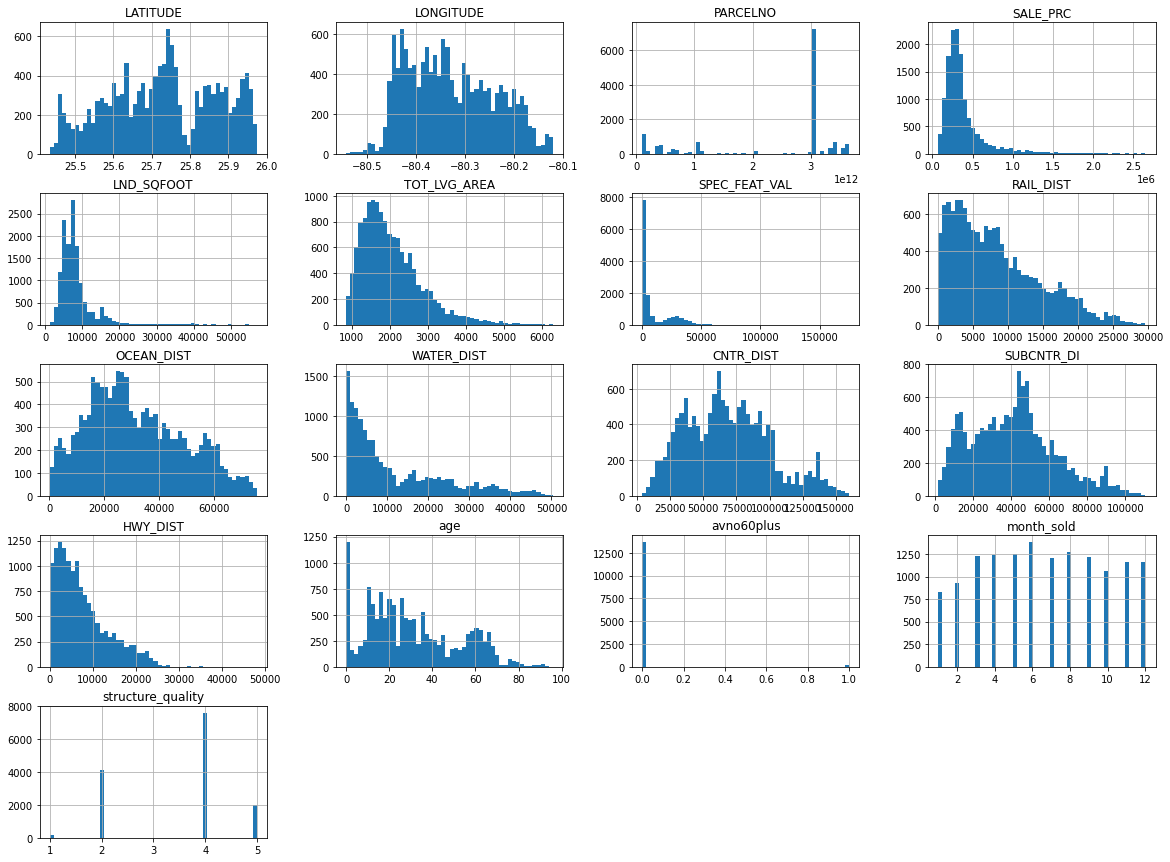

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt 
data.hist(bins=50, figsize=(20,15)) 
plt.show()

###Data processing

Floor area is a very important attribute to predict median housing prices. In order to ensure that the test set is representative of the various categories of incomes in the whole dataset,  I create an income category attribute. I create an income category attribute with six categories (labeled from 1 to 6): category 1 ranges from 0 to 1000, category 2 from 1000 to 1500, and so on.

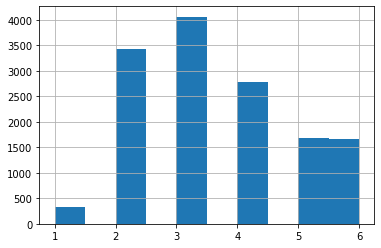

In [ ]:
data["floor_area"] = pd.cut(data["TOT_LVG_AREA"],
                               bins=[0, 1000, 1500, 2000, 2500, 3000, np.inf],
                               labels=[1, 2, 3, 4, 5, 6])
data["floor_area"].hist()

Next is to Creat a test set, I pick 20% of the dataset. I used stratified sampling methos to stratified test and training sets which based on different floor area. This ensures that the test set will remain consistent across multiple runs, even if you refresh the dataset.


In [ ]:
# SALE_PRC is y
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) 
for train_index, test_index in split.split(data, data["floor_area"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]
for set_ in (strat_train_set, strat_test_set):
    set_.drop("floor_area", axis=1, inplace=True)
X_raw = strat_train_set.drop("SALE_PRC", axis=1)
y = strat_train_set["SALE_PRC"].copy()

The features have different scales (some very small, and others very large). Let's transform the features so that they have similar range of values. In min-max scaling, we subtract the feature from its minimum value and then divide by its range so that the scaled values are between 0 and 1. 

In [ ]:
## Feature scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

minmax_scaler, std_scaler = MinMaxScaler(), StandardScaler() 
X__raw_minmax = pd.DataFrame(minmax_scaler.fit_transform(X_raw),
                            columns=X_raw.columns)
X_raw_std = pd.DataFrame(std_scaler.fit_transform(X_raw),
                         columns=X_raw.columns)
X_raw_std.head()

,LATITUDE,LONGITUDE,PARCELNO,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,-0.283847,-1.464917,0.576290,-0.675158,-0.354354,-0.588289,-0.145791,1.430098,3.031939,0.765846,0.292065,2.429920,-0.458684,-0.125199,1.621612,0.438636
1,0.127113,-1.322657,0.576098,-0.366193,1.001249,1.841429,0.844283,1.933552,2.048237,0.481287,0.327305,0.999784,-0.881590,-0.125199,-0.806802,0.438636
2,-0.287619,-0.081039,0.568786,0.240781,0.203045,1.054600,-0.683105,-0.419350,0.507350,-0.373736,-1.546995,-0.653310,-0.928579,-0.125199,-1.110354,0.438636
3,-0.590248,0.468487,-0.257711,1.103726,1.565982,2.101821,1.042496,-1.547430,-0.915946,-0.379744,-1.049378,1.264032,-0.881590,-0.125199,0.407405,1.351369
4,-1.134970,-0.288554,1.086077,0.153276,-0.965536,-0.439390,-0.086550,-0.941616,-0.748870,0.732765,0.175991,-0.727843,-0.458684,-0.125199,-1.717457,-1.386830


 Pipeline class provides a systematic way of "packaging" such a sequence of transformations.

In [ ]:
## Transformation pipelines
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

X_raw_std2 = num_pipeline.fit_transform(X_raw)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
num_features = X_raw.drop(["avno60plus","structure_quality"], axis=1)
num_attribs = list(num_features)

cat_attribs = ["avno60plus","structure_quality"]

num_attribs = list(X_raw)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

X = full_pipeline.fit_transform(X_raw)
X_test_raw = strat_test_set.drop("SALE_PRC", axis=1)
y_test = strat_test_set["SALE_PRC"].copy()
X_test = full_pipeline.transform(X_test_raw)

This is the linear regression model. Linear regression is a machine learning algorithm based on supervised learning. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting.

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
res1 = lin_reg.predict(X[:10,])
res1

array([ 212301.14010484,  508794.33958772,  589916.22310503,
       1228969.46274359,  126498.46002562,  613114.42254264,
        506922.43590078,  116251.49290678,  661002.86221504,
        185296.18244077])

measure the out-of-sample performance with root mean square error (RMSE) and mean absolute error (MAE).

In [ ]:
# RMSE & MAE in-sample performance of the linear regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_fit = lin_reg.predict(X)
# The in-sample RMSE is
lin_reg_rmse = np.sqrt(mean_squared_error(y, y_fit))
lin_reg_rmse
print(lin_reg_rmse)
# The in-sample MAE is
lin_reg_mae = mean_absolute_error(y,y_fit)
lin_reg_mae
print(lin_reg_mae)



161939.08377343102
105436.72364960088


###Tunning

First Way

Cross-Validation is an essential tool in ML. It allows us to utilize our data better. The classic approach is to do a simple 80%-20% split, n cross-validation, we do more than one split. We can do 3, 5, 10 or any K number of splits. Those splits called Folds, and there are many strategies we can create these folds with.
To obtain out-of-sample performance, we use K-fold cross validation. Use the cross_val_score function to perform 1000-fold cross-validation on the linear regression.

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, X, y,
                         scoring="neg_root_mean_squared_error", cv=1000)
#the number of samples: n_samples=11145
lin_reg_CV_scores = -scores
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())

display_scores(lin_reg_CV_scores)

Scores: [ 65671.57662422  75571.07942796  84480.90471598 113820.49886771
 193090.83072298 192417.84691902 124389.98954271 315402.28040617
 183776.62442476 187818.3455297  319840.50443437  88796.63750904
 120331.49606579 163690.84882104 103877.59718106 183232.51640456
 170598.65176265 101335.13057692 144040.92878674 244099.59750137
 106922.67675726  69504.30878795 243476.73863728 151051.70425515
  79502.42889757  58481.43805394  68897.64023355  94537.07826275
 106351.10185636 158740.75366478 120235.63355815 114056.21773595
  83556.42725341 246338.58127133 108965.98442668 150442.82228449
 105789.21666263  91341.91616508 234727.000976   216269.39557432
  92244.85064661  76885.04454501 119160.76981155 165759.03310686
 261417.52743259 154171.89047335 105745.35232254 192105.35858418
  91320.9801731  102311.88133489 171304.41604663  98984.79266729
 158268.27179364 148852.41234932 100511.14170707 338730.6628781
 128613.04920366 100304.23949529 112356.37382861 130676.0670312
 144099.52864601  8

The MSE is 144838 which is smaller than 161939. So, this way is useful to decrease MSE.

Second Way

Polynomial.
Regularizing linear regression:This is a form of regression, that constrains/ regularizes or shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, so as to avoid the risk of overfitting. Firstly Fit a model that adds degree 1 polynomial terms to the linear regression. Next, regularize the model using ridge regression with parameter alpha=1

In [ ]:

from sklearn.preprocessing import PolynomialFeatures
polyfeatures = Pipeline([
        ("poly_features", PolynomialFeatures(degree=1,
                                             include_bias=False)),
        ('std_scaler', StandardScaler())
    ])
X_poly = polyfeatures.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

     

LinearRegression()

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X_poly, y)

Ridge(alpha=1, solver='cholesky')

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline

def plot_learning_curves(model, X, y, start=1, step=1):
    X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(start, len(X_train), step):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_err = mean_squared_error(y_train[:m],y_train_predict)
        val_err = mean_squared_error(y_val, y_val_predict)
        train_errors.append(train_err)
        val_errors.append(val_err)
        print("\rstep {} / {}, train_error = {:.2f}, val_errorr = {:.2f}"
              .format(m, len(X_train), 
                      np.sqrt(train_err), np.sqrt(val_err)),end="")
        
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size in {} observations"
           .format(step), fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)                         

step 8001 / 8916, train_error = 162098.74, val_errorr = 165800.69

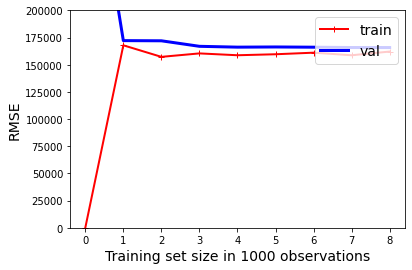

In [ ]:
step = 1000
plot_learning_curves(lin_reg, X, y, start=1, step=step)
plt.axis([None,None, 0,200000]) 
plt.show()  
                                 

In [ ]:
y_fit1 = lin_reg.predict(X)
np.sqrt(mean_squared_error(y_fit1, y))

162005.57003535624

step 8001 / 8916, train_error = 162100.51, val_errorr = 165802.56

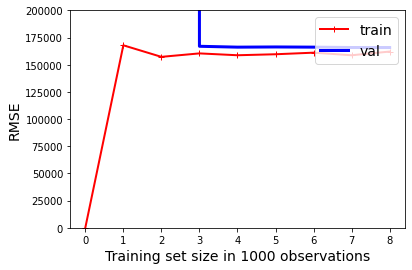

In [ ]:
plot_learning_curves(lin_reg, X_poly, y, start=1, step=step)
plt.axis([None,None, 0,200000]) 
plt.show()  

In [ ]:
y_fit1 = lin_reg.predict(X_poly)
np.sqrt(mean_squared_error(y_fit1, y))

162009.00975499136

step 8001 / 8916, train_error = 162098.96, val_errorr = 165802.34

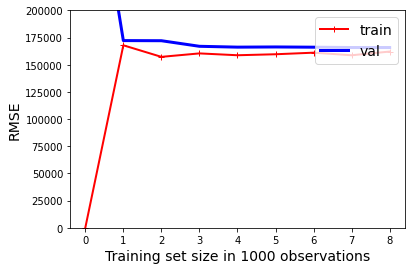

In [ ]:
plot_learning_curves(ridge_reg, X_poly, y, start=1, step=step)
plt.axis([None,None, 0,200000]) 
plt.show()  

In [ ]:
y_fit2 = ridge_reg.predict(X_poly)
np.sqrt(mean_squared_error(y_fit2, y))

162006.57101533044

However, all MSEs are bigger than 161939, So, this is not a good way.

Secondly, fit a model that adds degree 2 polynomial terms to the linear regression. Next, regularize the model using ridge regression with parameter alpha=1

In [ ]:
## degree = 2
from sklearn.preprocessing import PolynomialFeatures
polyfeatures = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2,
                                             include_bias=False)),
        ('std_scaler', StandardScaler())
    ])
X_poly = polyfeatures.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)



LinearRegression()

step 8001 / 8916, train_error = 96760.84, val_errorr = 44025981624612896.00

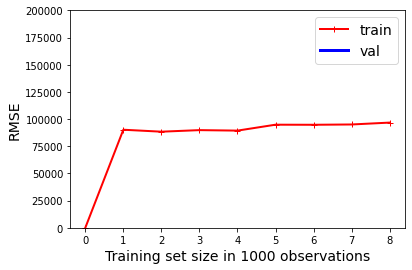

In [ ]:
plot_learning_curves(lin_reg, X_poly, y, start=1, step=step)
plt.axis([None,None, 0,200000]) 
plt.show()

In [ ]:
y_fit4 = lin_reg.predict(X_poly)
np.sqrt(mean_squared_error(y_fit4, y))

4.424091986340566e+16

step 8001 / 8916, train_error = 96849.42, val_errorr = 113314.90

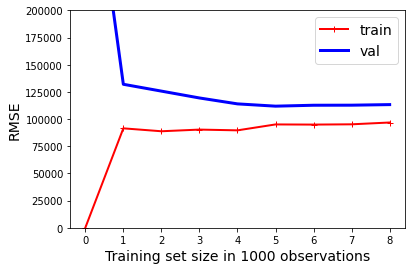

In [ ]:
plot_learning_curves(ridge_reg, X_poly, y, start=1, step=step)
plt.axis([None,None, 0,200000]) 
plt.show()

In [ ]:
y_fit3 = ridge_reg.predict(X_poly)
np.sqrt(mean_squared_error(y_fit3, y))

100925.55091220616

The RMSE score for this combination is 100926, which is better than the score we obtained before. 

Reference
1.Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow, Aur ́elien G ́eron, 2nd edition, O’Reilly, 2019
2.HW1

# Results & Comparison

The best model created using DNN is a model with a RELU activation function, He normalization, Nadam optimizer, and performance scheduling. The best parameters are a learning_rate of 0.0033625641252688094, 2 hidden layers, and 42 neurons. This model with 1000 epochs gives an RMSE score of 92064.

SVM regression with a sigmoid kernel of the reduced set generates the lowest RMSE score of 305099. This optimal situation occurs when C equals 4.745 and gamma equals 0.08. 

The best score for the random forest regression model is given by setting the max_features hyperparameter to 6, the n_estimators hyperparameter to 100, and the RMSE score for this combination is 80802.

Through Polynomial linear regression, the RMSE of the regression model is 100926 which is under ridge regression with degree=2, alpha=1. So, the best RMSE is 100926.

# Conclusion

By analyzing historical data for house prices in Miami along with various relevant features, we established some interesting patterns and figures. Using machine learning techniques, we were then able to build 4 different models to describe our data and predict house prices. After comparing the RMSE in different models, we found that the random forest regression model has the best out-of-sample performance with the smallest RMSE. This model can therefore be used to predict, for example, which type of house within Miami is likely to increase and decrease in price in the year 2016 based on different variables.

# Citation



1.   Géron, Aurélien. *Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow*.
2.   Lu, Kevin. CFRM 521. *Homework & Slides*.
3.   Kaggle. From https://www.kaggle.com/datasets/deepcontractor/miami-housing-dataset

